In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# loading the dataset
df = pd.read_csv('orders.csv')
print(df)

       order_date  pages_visited         order_id customer_id  \
0      2016/09/04              9  HTS-038040-0002      038040   
1      2014/11/14             11  HTS-801797-0001      801797   
2      2017/02/26             10  HTS-vft1eu-0003      vft1eu   
3      2013/12/01             10  HTS-914324-0001      914324   
4      2015/10/22             12  HTS-88ua9r-0001      88ua9r   
...           ...            ...              ...         ...   
26547  2016/11/19             13  HTS-n641x4-0001      n641x4   
26548  2016/08/02              4  HTS-q0nm12-0001      q0nm12   
26549  2017/03/09              6  HTS-sby0iz-0001      sby0iz   
26550  2016/10/04             11  HTS-uz70x4-0001      uz70x4   
26551  2016/12/16              9  HTS-xnbc22-0001      xnbc22   

       tshirt_category  tshirt_price  tshirt_quantity  
0      White T-Shirt M          20.0                1  
1      White T-Shirt M          20.0                1  
2      White T-Shirt F          18.0               

In [3]:
# unique values of 'order_date'
df['order_date'].drop_duplicates()

0        2016/09/04
1        2014/11/14
2        2017/02/26
3        2013/12/01
4        2015/10/22
            ...    
22042    2013/05/18
22132    2013/06/13
24365    2013/03/29
25354    2013/05/19
25667    2013/05/04
Name: order_date, Length: 1431, dtype: object

In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26552 entries, 0 to 26551
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_date       26552 non-null  object 
 1   pages_visited    26552 non-null  int64  
 2   order_id         26552 non-null  object 
 3   customer_id      26552 non-null  object 
 4   tshirt_category  26552 non-null  object 
 5   tshirt_price     26552 non-null  float64
 6   tshirt_quantity  26552 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.4+ MB


In [5]:
# how many orders each customer made during the whole timeframe
df.groupby('customer_id').count()

,order_date,pages_visited,order_id,tshirt_category,tshirt_price,tshirt_quantity
customer_id,,,,,,
000018,3,3,3,3,3,3
000071,3,3,3,3,3,3
000440,5,5,5,5,5,5
000452,2,2,2,2,2,2
000652,2,2,2,2,2,2
...,...,...,...,...,...,...
zypnti,1,1,1,1,1,1
zyvn97,2,2,2,2,2,2
zzolm4,1,1,1,1,1,1


In [6]:
# unique values of 'tshirt category'
df.get("tshirt_category").drop_duplicates()

0      White T-Shirt M
2      White T-Shirt F
3          Wh Tshirt F
5      Black T-Shirt F
6               Hoodie
7      Black T-Shirt M
9         Tennis Shirt
10         Wh Tshirt M
11         Bl Tshirt F
123        Bl Tshirt M
Name: tshirt_category, dtype: object

In [7]:
# tshirts have two different features: color (black & white) and gender (female & male, not size!)
# 'color' and 'gender' features are added to the dataframe
# 'tshirt_category' also has 'Hoodie' and 'Tennis Shirt' which are valued 'NaN' in 'color' and 'gender'
new = df["tshirt_category"].str.split(" ", n = 2, expand = True)
df['color'] = new[0]
df['gender'] = new[2]
df['color'] = df['color'].str.replace("Hoodie", "NaN",  case=False)
# missing and non-matching 'tshirt_category' values are corrected to be the same
df['tshirt_category'] = df['tshirt_category'].str.split(' ',expand=True).replace('Bl','Black').fillna('').apply(' '.join,1)
df['tshirt_category'] = df['tshirt_category'].str.split(' ',expand=True).replace('Wh','White').fillna('').apply(' '.join,1)
df['tshirt_category'] = df['tshirt_category'].str.split(' ',expand=True).replace('Tshirt','T-Shirt').fillna('').apply(' '.join,1)
df['color'] = df['color'].str.split(' ',expand=True).replace('Bl','Black').fillna('').apply(' '.join,1)
df['color'] = df['color'].str.split(' ',expand=True).replace('Wh','White').fillna('').apply(' '.join,1)
df['color'] = df['color'].str.split(' ',expand=True).replace('Tennis','NaN').fillna('').apply(' '.join,1)
df.fillna(value=pd.np.nan, inplace=True)
df

/Users/demrebuyuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from ipykernel import kernelapp as app


,order_date,pages_visited,order_id,customer_id,tshirt_category,tshirt_price,tshirt_quantity,color,gender
0,2016/09/04,9,HTS-038040-0002,038040,White T-Shirt M,20.0,1,White,M
1,2014/11/14,11,HTS-801797-0001,801797,White T-Shirt M,20.0,1,White,M
2,2017/02/26,10,HTS-vft1eu-0003,vft1eu,White T-Shirt F,18.0,3,White,F
3,2013/12/01,10,HTS-914324-0001,914324,White T-Shirt F,18.0,1,White,F
4,2015/10/22,12,HTS-88ua9r-0001,88ua9r,White T-Shirt M,20.0,1,White,M
...,...,...,...,...,...,...,...,...,...
26547,2016/11/19,13,HTS-n641x4-0001,n641x4,White T-Shirt M,20.0,1,White,M
26548,2016/08/02,4,HTS-q0nm12-0001,q0nm12,White T-Shirt M,20.0,1,White,M
26549,2017/03/09,6,HTS-sby0iz-0001,sby0iz,White T-Shirt M,20.0,1,White,M
26550,2016/10/04,11,HTS-uz70x4-0001,uz70x4,Hoodie,23.0,5,NaN,NaN


In [9]:
# unique values of corrected 'tshirt category'
df.get("tshirt_category").drop_duplicates()

0    White T-Shirt M
2    White T-Shirt F
5    Black T-Shirt F
6           Hoodie  
7    Black T-Shirt M
9      Tennis Shirt 
Name: tshirt_category, dtype: object

In [10]:
# 'year_month' feature is extracted from the 'order_date'
new = df["order_date"].str.split("/", n = 2, expand = True)
df["year_month"] =  new[0] + "-" + new[1]
#pd.to_datetime(df["order_date"], format='%Y/%m/%d')
df["year_month"]

0        2016-09
1        2014-11
2        2017-02
3        2013-12
4        2015-10
          ...   
26547    2016-11
26548    2016-08
26549    2017-03
26550    2016-10
26551    2016-12
Name: year_month, Length: 26552, dtype: object

In [11]:
# 'order_price' is calculated in the new column
df['order_price'] = df['tshirt_price']*df['tshirt_quantity']
df['order_price']

0         20.0
1         20.0
2         54.0
3         18.0
4         20.0
         ...  
26547     20.0
26548     20.0
26549     20.0
26550    115.0
26551     57.0
Name: order_price, Length: 26552, dtype: float64

In [13]:
# 'monthly_sum' is calculated for the upcoming plot
monthly_sum = df.groupby(by=["year_month"])['order_price'].agg('sum')

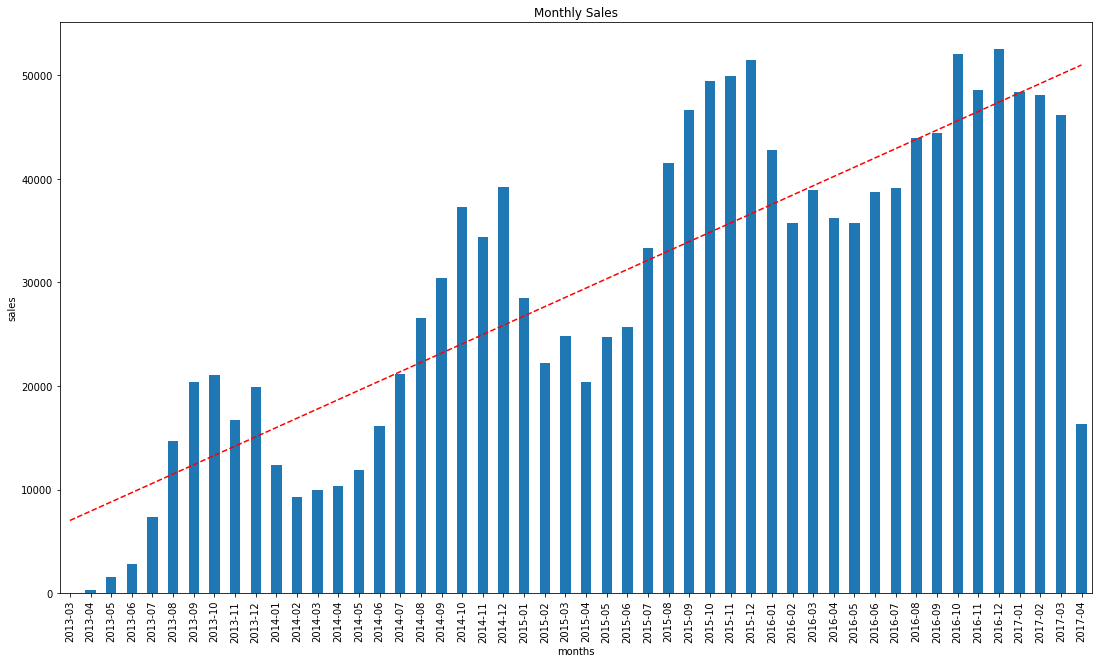

In [14]:
# monthly amount of sales on a barplot with a linear trendline
monthly_sum.plot(figsize=(18.5, 10.5), title="Monthly Sales", kind="bar")
numbers = np.array(range(0, len(monthly_sum)))
m, b = np.polyfit(numbers, monthly_sum, 1)
# plt.bar(monthly_sum)        
plt.plot(numbers, m*numbers + b, 'r--')
plt.ylabel('sales')
plt.xlabel('months')
fig = plt.gcf()

In [21]:
# most successful month is the month that has a high nominal increase and also has a high percentage increase in sales together from the previous year
# '2013-08' and '2013-07' seem to be the most successful months

# monthly_sum[((monthly_sum-monthly_sum.shift())/monthly_sum).max()]
ms = monthly_sum.to_frame()
ms['inc_percentage'] = (ms-ms.shift())/ms.shift()
ms['inc_nominal'] = ms['order_price']-ms['order_price'].shift()
ms.sort_values(by=['inc_nominal', 'inc_percentage'], ascending=False)

,order_price,inc_percentage,inc_nominal
year_month,,,
2015-08,41537.5,0.245820,8196.0
2016-10,52081.0,0.172058,7645.5
2015-07,33341.5,0.295243,7600.0
2013-08,14712.0,0.998506,7350.5
2014-10,37289.5,0.224835,6845.0
2013-09,20419.5,0.387949,5707.5
2014-08,26606.0,0.258502,5465.0
2015-09,46614.0,0.122215,5076.5
2014-07,21141.0,0.312453,5033.0


In [22]:
# monthly visited page counts
monthly_visit = df.groupby(by=["year_month"])['pages_visited'].agg('sum')
mv = monthly_visit.to_frame()

In [23]:
# last 2 columns are dropped from the ms
ms.drop(ms.iloc[:, 1:3], inplace = True, axis = 1) 

In [20]:
# to compare the sales and page counts, they are binded

#df=df.drop(df.columns[-1], axis=1)
monthly_compare = pd.concat([ms, mv],  axis=1)
monthly_compare

,order_price,pages_visited
year_month,,
2013-03,19.0,13
2013-04,298.0,68
2013-05,1523.0,389
2013-06,2816.5,739
2013-07,7361.5,1968
2013-08,14712.0,3701
2013-09,20419.5,4957
2013-10,21064.5,5045
2013-11,16737.0,4166


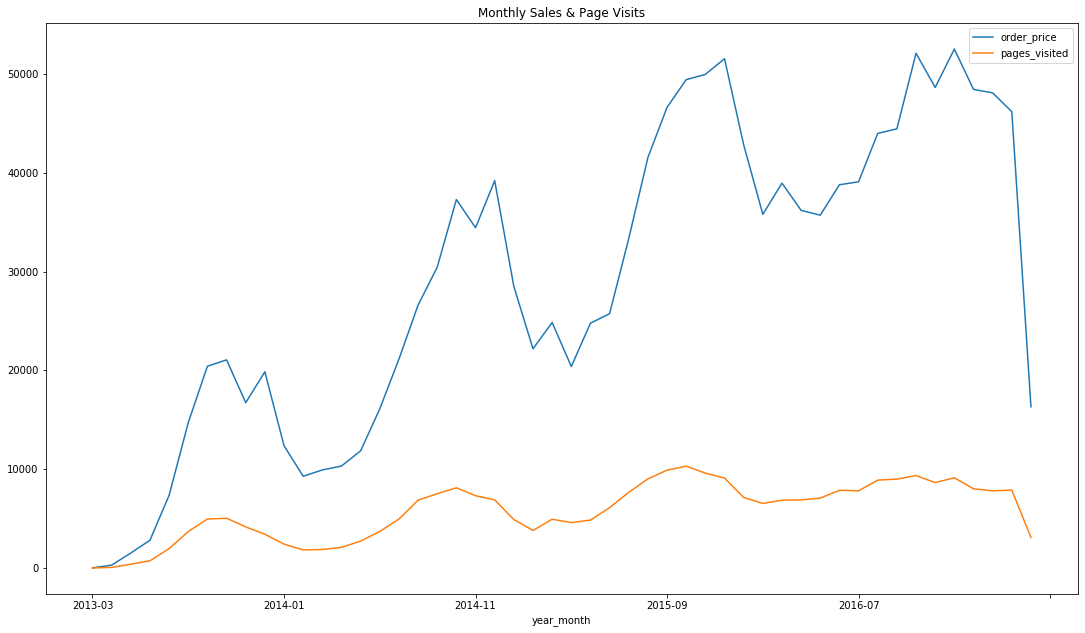

In [24]:
# there seems to be a correlation between sales and page visits based on the line plot

monthly_compare.plot(figsize=(18.5, 10.5), title="Monthly Sales & Page Visits")

In [25]:
# R-square is calculated to scale the correalation degree between page visit and sales
# R-square is very close to 1 which implies very high correlation
correlationValue = monthly_compare['order_price'].corr(monthly_compare['pages_visited'], method='spearman')
print("R^2 (Correlation Value) for sales and page visits is {} ".format(correlationValue))

R^2 (Correlation Value) for sales and page visits is 0.9598559423769507 


In [26]:
# year is extracted from the 'order_date'
pd.to_datetime(df["order_date"], format='%Y/%m/%d').dt.year

0        2016
1        2014
2        2017
3        2013
4        2015
         ... 
26547    2016
26548    2016
26549    2017
26550    2016
26551    2016
Name: order_date, Length: 26552, dtype: int64

In [27]:
# year is extracted from the 'order_date' and added as a new column
df["year"] = df["order_date"].str.split("/", n = 2, expand = True)[0]
# customer_year = pd.concat([ms, mv],  axis=1)

# aggregating based on 'customer_id' and 'year'
customer_year = df.groupby(by=["customer_id",'year'])['order_id'].agg('count')
cy = customer_year.to_frame().reset_index()
cy
# lol = pd.concat([cy, df['year']],  axis=1)
# lol
# cy[cy['order_id'] > 3]

,customer_id,year,order_id
0,000018,2013,1
1,000018,2014,1
2,000018,2015,1
3,000071,2014,1
4,000071,2015,1
...,...,...,...
23296,zyvn97,2015,1
23297,zyvn97,2016,1
23298,zzolm4,2015,1
23299,zzw4gs,2015,1


In [28]:
# cy dataframe is pivoted to show each customer's orders per year
cy = cy.pivot(index='customer_id', columns='year', values='order_id').fillna(0)
cy

year,2013,2014,2015,2016,2017
customer_id,,,,,
000018,1.0,1.0,1.0,0.0,0.0
000071,0.0,1.0,1.0,1.0,0.0
000440,0.0,2.0,1.0,1.0,1.0
000452,0.0,1.0,0.0,1.0,0.0
000652,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
zypnti,0.0,0.0,0.0,0.0,1.0
zyvn97,0.0,0.0,1.0,1.0,0.0
zzolm4,0.0,0.0,1.0,0.0,0.0


In [29]:
# customer ranking based on order count per year are added to dataframe

cy = cy.sort_values(by=['2013'], ascending=False).reset_index().reset_index()
cy.rename(columns = {'index':'2013_Rankings'}, inplace = True)
cy = cy.sort_values(by=['2014'], ascending=False).reset_index()
cy.rename(columns = {'index':'2014_Rankings'}, inplace = True)
cy = cy.sort_values(by=['2015'], ascending=False).reset_index()
cy.rename(columns = {'index':'2015_Rankings'}, inplace = True)
cy = cy.sort_values(by=['2016'], ascending=False).reset_index()
cy.rename(columns = {'index':'2016_Rankings'}, inplace = True)
cy = cy.sort_values(by=['2017'], ascending=False).reset_index()
cy.rename(columns = {'index':'2017_Rankings'}, inplace = True)

In [30]:
cy

year,2017_Rankings,2016_Rankings,2015_Rankings,2014_Rankings,2013_Rankings,customer_id,2013,2014,2015,2016,2017
0,0,5,0,6814,6814,269567,0.0,6.0,3.0,6.0,2.0
1,6244,2103,5396,10370,10370,6jl2gf,0.0,0.0,1.0,1.0,1.0
2,6261,2008,5152,7008,7008,1likwf,0.0,0.0,1.0,1.0,1.0
3,6257,2017,5064,11641,11641,4o0yyu,0.0,0.0,1.0,1.0,1.0
4,6252,2009,5154,7013,7013,1w1fme,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11646,1780,7263,11457,4915,4915,nzf8a9,0.0,0.0,0.0,1.0,0.0
11647,5405,3315,10597,4680,4680,ialpvk,0.0,0.0,1.0,1.0,0.0
11648,5404,942,4946,10408,10408,437591,0.0,0.0,2.0,1.0,0.0
11649,1781,7261,9183,2247,2247,wa9mb2,0.0,0.0,0.0,1.0,0.0


In [31]:
# order counts per year made by customers are dropped
cy.drop(cy.iloc[:, 6:11], inplace = True, axis = 1) 
# rankings in the first year are sorted
aq = cy.sort_values(by=['2013_Rankings'], ascending=True).head(20)
# aq['background-color: yellow' if v < 100 for v in aq]

In [33]:
# customers who made the first 100 rankings are typed red
# customers who made the first 100 rankings at least 3 times can be the loyal customers

def color_negative_red(val):    
    color = 'red' if int(val) < 100 else 'black'
    return 'color: %s' % color
s = aq.style.applymap(color_negative_red)
s

year,2017_Rankings,2016_Rankings,2015_Rankings,2014_Rankings,2013_Rankings,customer_id
2621,24,62,12,0,0,607741
2571,45,49,20,1,1,272461
2643,17,60,25,2,2,409679
2647,19,64,27,3,3,536917
10134,1292,66,28,4,4,978429
2632,26,954,29,5,5,315662
3790,7430,44,507,6,6,377766
2305,1155,857,487,7,7,682688
4235,8040,41,3508,8,8,334825
2359,1382,79,3507,9,9,374272


In [35]:
# 'tshirt_quantity' is aggregated into 'color' and 'year' and stored in a dataframe

year_color = df.groupby(by=["color",'year'])['tshirt_quantity'].agg('sum')
yc = year_color.to_frame().reset_index()
yc

,color,year,tshirt_quantity
0,Black,2013,1531
1,Black,2014,3940
2,Black,2015,6368
3,Black,2016,7957
4,Black,2017,2362
5,NaN,2013,1676
6,NaN,2014,3981
7,NaN,2015,6730
8,NaN,2016,8307
9,NaN,2017,2668


In [36]:
# dataframe is pivoted by the years and most preferred color is highlighted in each year

yc = yc.pivot(index='color', columns='year', values='tshirt_quantity').fillna(0)
yc = yc.drop(['NaN'])
yc.style.highlight_max()

year,2013,2014,2015,2016,2017
color,,,,,
Black,1531,3940,6368,7957,2362
White,1943,4861,7542,8851,2798


In [40]:
import pandasql as ps

# number of customers who made orders during the timeframe

q1 ="""
select count(distinct customer_id) as Count from df
"""
ps.sqldf(q1, locals())
#df["customer_id"].drop_duplicates().count()

,Count
0,11651


In [41]:
# number of customers made orders in the first year and in one of the following years

q2 = """
select count(distinct customer_id) as Count from df 
where customer_id in (select customer_id from df where order_date < '2014/01/01') 
and 
customer_id in (select customer_id from df where order_date >= '2014/01/01')
"""
ps.sqldf(q2, locals())

,Count
0,1696


In [42]:
# number of customers made orders in the first or second year but did not make an order after second year

q3 = """
select count(distinct customer_id) as Count from df 
where customer_id in (select customer_id from df where order_date < '2015/01/01') 
and 
customer_id not in (select customer_id from df where order_date >= '2015/01/01')

"""
ps.sqldf(q3, locals())

,Count
0,1030


In [44]:
# yearly percentages of counts of t-shirt genders in the orders

q4 = """
select a.year, gender, 1.0*c/s as ratio from
(select year, count() as s from df where gender <> 'None' group by year) a,
(select year, gender, count(customer_id) c from df where gender <> 'None' group by year, gender) b
where a.year=b.year
"""
ps.sqldf(q4, locals())

,year,gender,ratio
0,2013,F,0.404119
1,2013,M,0.595881
2,2014,F,0.391993
3,2014,M,0.608007
4,2015,F,0.400756
5,2015,M,0.599244
6,2016,F,0.411372
7,2016,M,0.588628
8,2017,F,0.404046
9,2017,M,0.595954


In [45]:
print("There is no change in trend based on gender F: ~40%, M: ~60% ")

There is no change in trend based on gender F: ~40%, M: ~60% 


In [46]:
# unit price of each t-shirt category
# tennis shirt has the highest unit price

q5 = """
select tshirt_category, tp/tq as Unit_Price from 
(select tshirt_category, sum(tshirt_price*tshirt_quantity) as tp, sum(tshirt_quantity) as tq from df 
group by tshirt_category) order by Unit_Price desc 
"""
ps.sqldf(q5, locals())

,tshirt_category,Unit_Price
0,Tennis Shirt,23.979477
1,Hoodie,22.984193
2,White T-Shirt M,20.000000
3,Black T-Shirt M,18.999763
4,White T-Shirt F,18.000000
5,Black T-Shirt F,17.500000
